In [ ]:
# manual download from here: https://singlecell.broadinstitute.org/single_cell/study/SCP1303/single-nuclei-profiling-of-human-dilated-and-hypertrophic-cardiomyopathy

from pathlib import Path

import plotnine as pn
import scanpy as sc
import partipy as pt

## downloading the data (or using cached data)
data_dir = Path("..") / "data"

adata = sc.read_h5ad(data_dir / "human_dcm_hcm_scportal_03.17.2022.h5ad")
adata = adata[
    adata.obs["cell_type_leiden0.6"].isin(
        ["Fibroblast_I", "Activated_fibroblast", "Fibroblast_II"]
    ),
    :,
].copy()
adata = adata[adata.obs["disease"].isin(["HCM"]), :].copy()
adata

In [2]:
adata.obs["disease"].value_counts()

disease
HCM    57644
Name: count, dtype: int64

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pp.pca(adata, mask_var="highly_variable")
adata.layers["z_scaled"] = sc.pp.scale(adata.X, max_value=10)

In [ ]:
# pt.compute_shuffled_pca(adata, mask_var="highly_variable", n_shuffle=25)
# pt.plot_shuffled_pca(adata)

In [5]:
pt.set_obsm(adata=adata, obsm_key="X_pca", n_dimensions=3)

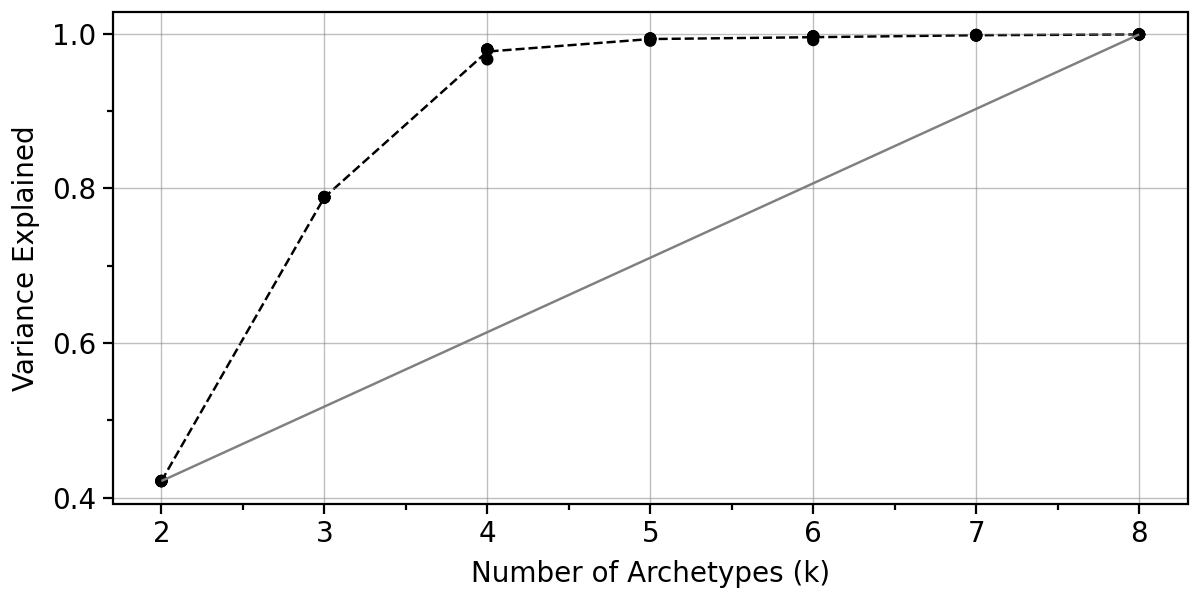

In [6]:
pt.compute_selection_metrics(adata=adata, min_k=2, max_k=8)
pt.plot_var_explained(adata)

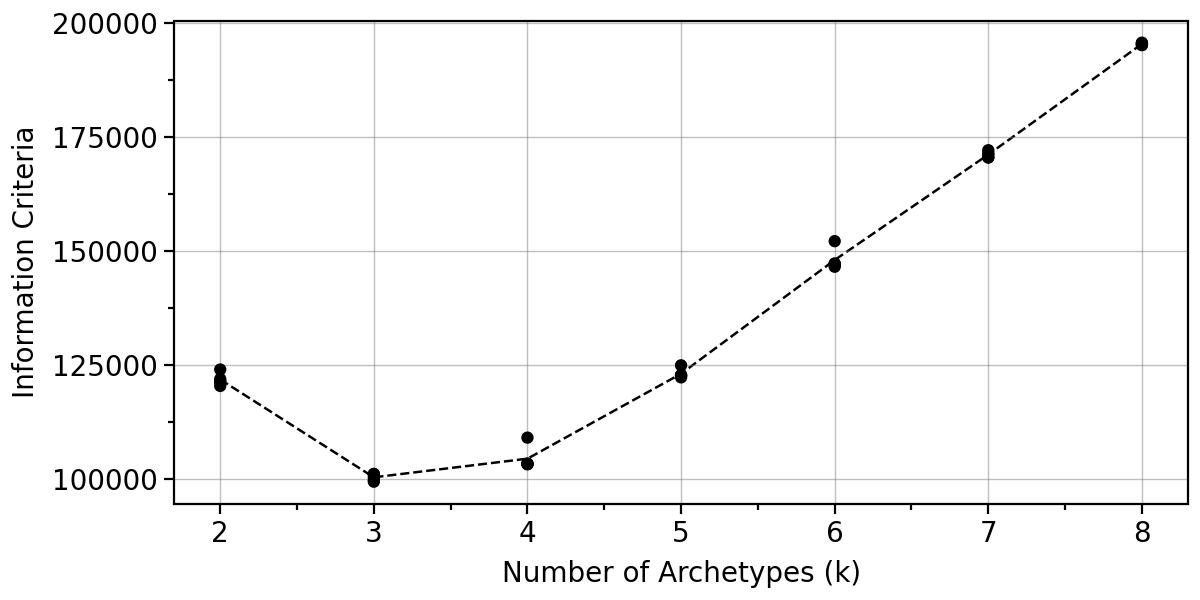

In [7]:
pt.plot_IC(adata)

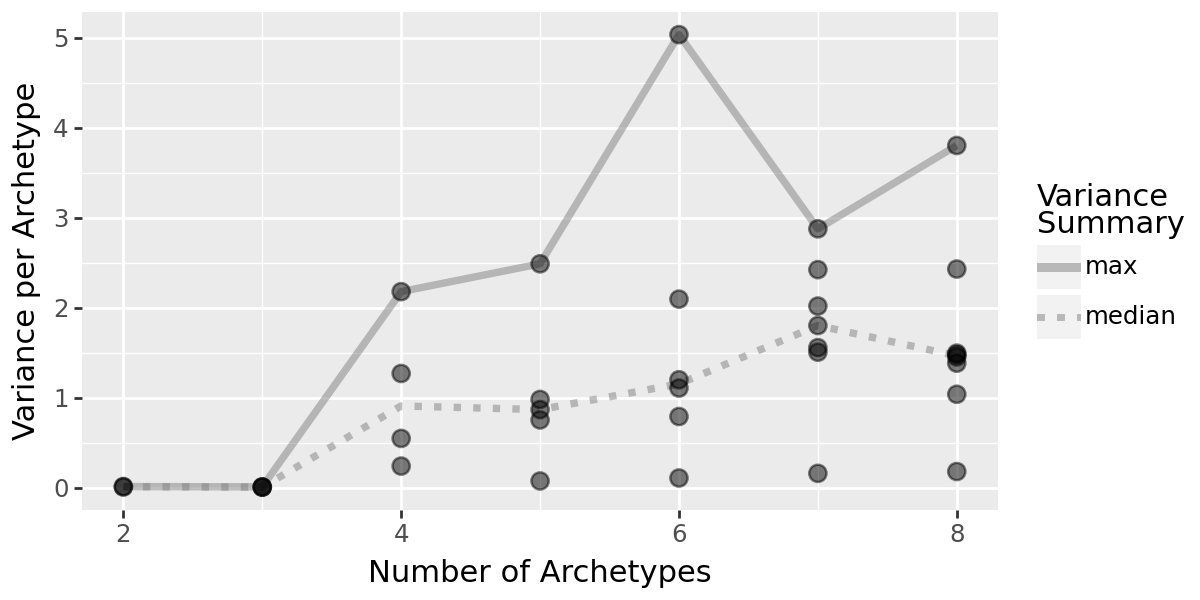

In [ ]:
pt.compute_bootstrap_variance(
    adata=adata, n_bootstrap=50, n_archetypes_list=range(2, 9)
)
pt.plot_bootstrap_variance(adata)

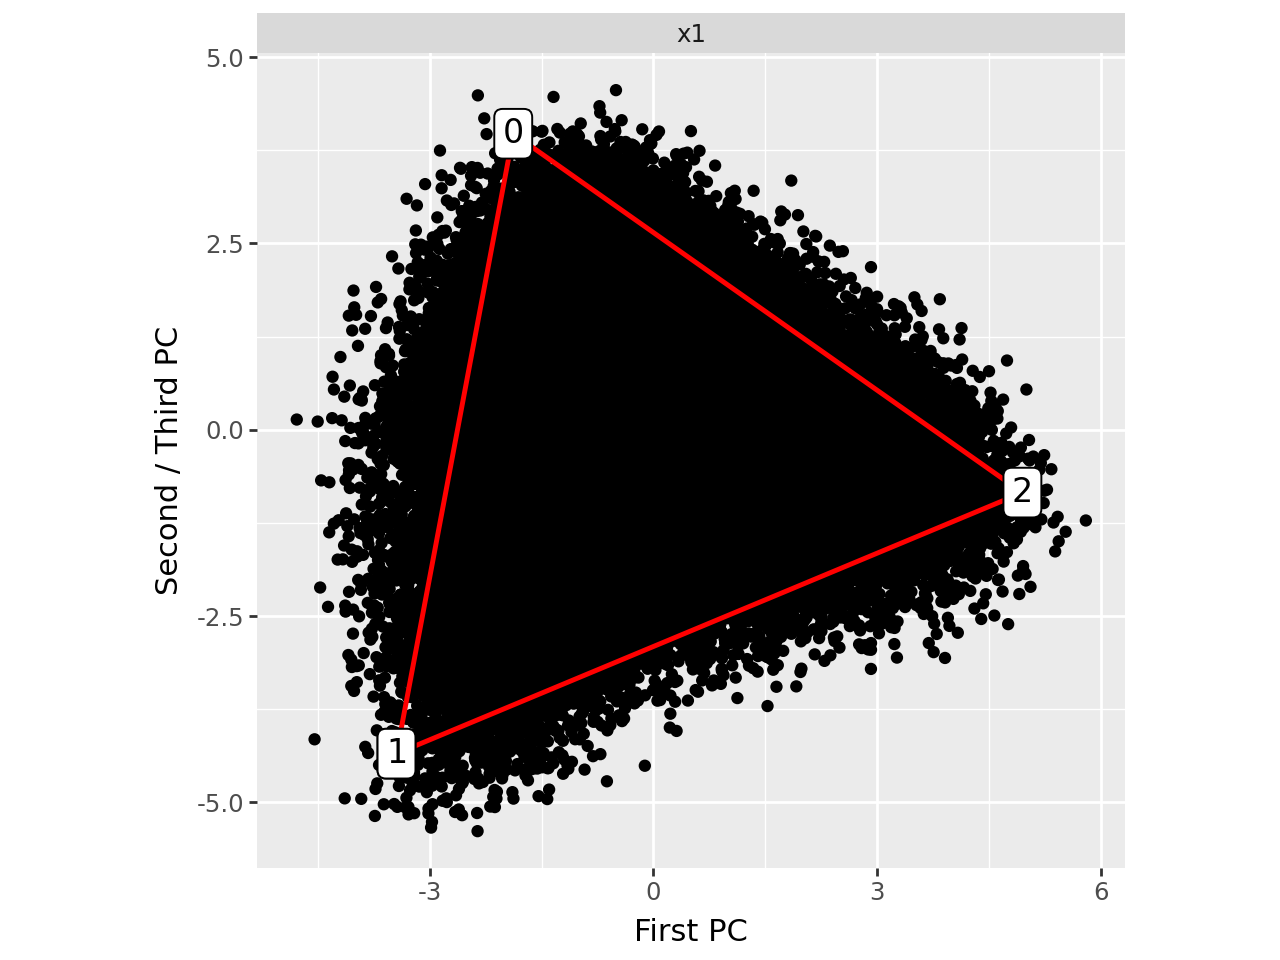

In [9]:
pt.compute_archetypes(adata, n_archetypes=3, archetypes_only=False)

pt.plot_archetypes_2D(adata=adata)

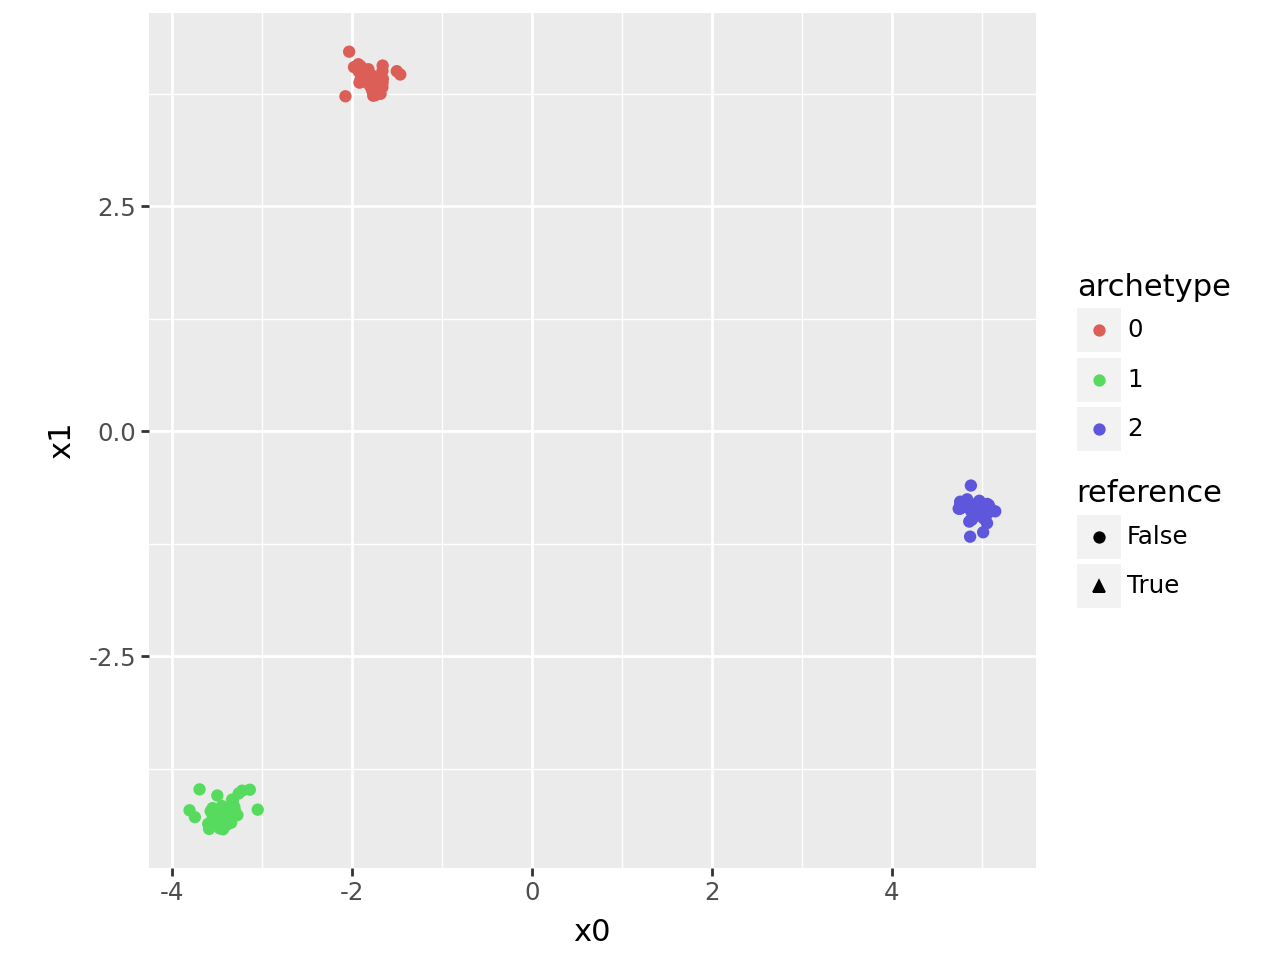

In [10]:
pt.plot_bootstrap_2D(adata, n_archetypes=3)

In [11]:
pt.compute_archetype_weights(adata=adata, mode="automatic")
archetype_expression = pt.compute_archetype_expression(adata=adata, layer="z_scaled")

Applied length scale is 2.51.


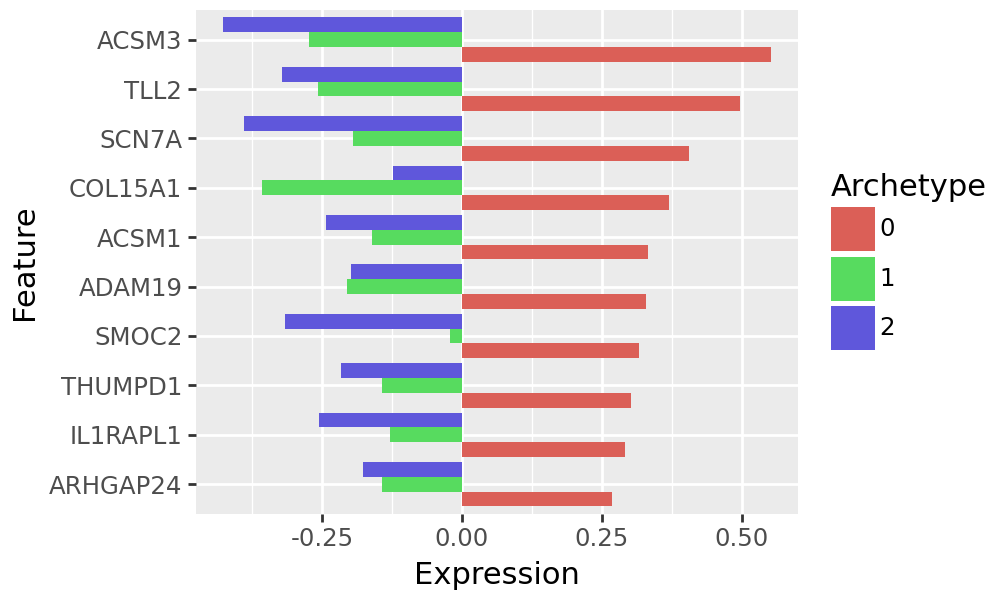

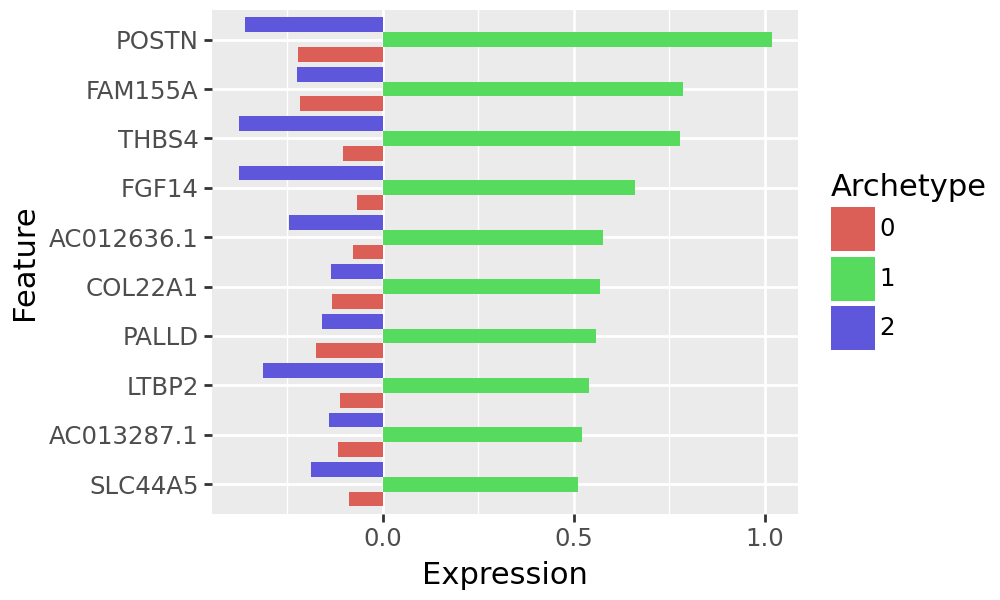

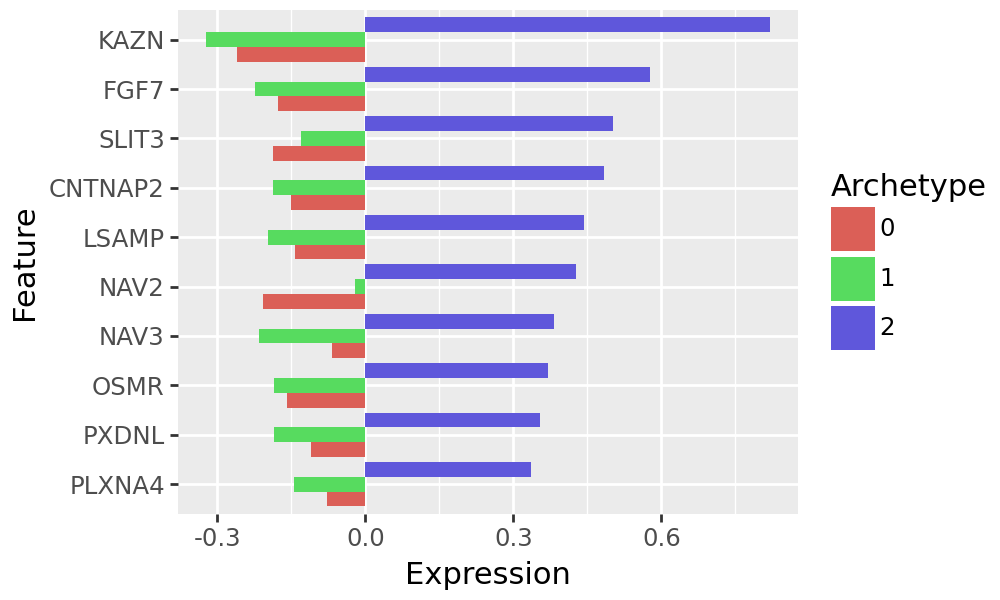

In [ ]:
for arch_idx in range(adata.uns["AA_results"]["Z"].shape[0]):
    p = pt.plot_top_genes(
        archetype_expression=archetype_expression, arch_idx=arch_idx, top_n=10
    ) + pn.theme(figure_size=(5, 3))
    p.show()